In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
kiva = pd.read_csv('kivamix.csv')

In [3]:
kiva.shape

(419156, 35)

Variables of interest: 



In [4]:
print(kiva['DESCRIPTION_TRANSLATED'].isnull().sum(), kiva['TAGS'].isnull().sum(), kiva['LOAN_USE'].isnull().sum())

3253 71842 3246


In [5]:
#Converting long text columns to length of words and count of characters
#Step1 is to replace nulls
kiva['DESCRIPTION_TRANSLATED'].fillna(' ', inplace=True)
kiva['TAGS'].fillna(' ', inplace=True)
kiva['LOAN_USE'].fillna(' ', inplace=True)

In [6]:
print(kiva['DESCRIPTION_TRANSLATED'].isnull().sum(), kiva['TAGS'].isnull().sum(), kiva['LOAN_USE'].isnull().sum())

0 0 0


In [7]:
#Step 2 is to update new columns
def word_len_count(column):
    word_count = len(column.split())
    return word_count

def char_len_count(column):
    char_count = column.replace(' ','')
    char_count = len(char_count[:])
    return char_count

kiva['word_count_DT'] = kiva['DESCRIPTION_TRANSLATED'].apply(word_len_count)
kiva['word_count_TAGS'] = kiva['TAGS'].apply(word_len_count)
kiva['word_count_LU'] = kiva['LOAN_USE'].apply(word_len_count)

kiva['char_count_DT'] = kiva['DESCRIPTION_TRANSLATED'].apply(char_len_count)
kiva['char_count_TAGS'] = kiva['TAGS'].apply(char_len_count)
kiva['char_count_LU'] = kiva['LOAN_USE'].apply(char_len_count)


In [8]:
kiva.head(2)

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,year,word_count_DT,word_count_TAGS,word_count_LU,char_count_DT,char_count_TAGS,char_count_LU
0,1455352,Raisa Jokasta,Spanish,"En la ciudad de Portoviejo, conocida como la c...",The city of Portoviejo is located in the valle...,1075.0,1075.0,1,2638561.0,NaN,...,true,monthly,field_partner,2018,192,5,4,924,36,26
1,1727469,Lorna,English,"Lorna is a married woman, 39 years old with fi...","Lorna is a married woman, 39 years old with fi...",225.0,400.0,0,3108106.0,NaN,...,true,monthly,field_partner,2019,75,3,12,371,28,69


In [9]:
#Mark whether Image and Video was provided
kiva['IMAGE_ID'] = np.where(kiva['IMAGE_ID'].isnull(), 0, 1)
kiva['VIDEO_ID'] = np.where(kiva['VIDEO_ID'].isnull(), 0, 1)

In [10]:
## Parse out borrower genders & borrower pictured
kiva['FEM_COUNT'] = kiva['BORROWER_GENDERS'].str.count("female")
kiva['MALE_COUNT'] = kiva['BORROWER_GENDERS'].str.count("male")
kiva['PIC_TRUE_COUNT'] = kiva['BORROWER_PICTURED'].str.count("true")
kiva['PIC_FALSE_COUNT'] = kiva['BORROWER_PICTURED'].str.count("false")


In [11]:
kiva['ANY_FEM'] = kiva['BORROWER_GENDERS'].str.contains('female').map({True:1, False:0})
kiva['ANY_MALE'] = kiva['BORROWER_GENDERS'].str.contains('male').map({True:1, False:0})
kiva['month'] = kiva['POSTED_TIME'].str[5:7]

In [12]:
#Drop unrequired columns

kiva.drop(columns = ['DESCRIPTION_TRANSLATED', 'LOAN_USE', 'TAGS', 'DESCRIPTION','LOAN_ID','LOAN_NAME', 'FUNDED_AMOUNT', 'DESCRIPTION', 'TOWN_NAME', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME', 'POSTED_TIME', 'RAISED_TIME', 'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'BORROWER_NAMES', 'COUNTRY_NAME', 'CURRENCY_POLICY','year', 'BORROWER_GENDERS', 'BORROWER_PICTURED', 'IMAGE_ID', 'VIDEO_ID'], inplace=True)

In [13]:
kiva.head(2)

,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,COUNTRY_CODE,LENDER_TERM,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,word_count_DT,...,char_count_DT,char_count_TAGS,char_count_LU,FEM_COUNT,MALE_COUNT,PIC_TRUE_COUNT,PIC_FALSE_COUNT,ANY_FEM,ANY_MALE,month
0,Spanish,1075.0,1,Natural Medicines,Health,EC,6.0,monthly,field_partner,192,...,924,36,26,1.0,1.0,1.0,0.0,1.0,1.0,01
1,English,400.0,0,Personal Products Sales,Retail,PH,14.0,monthly,field_partner,75,...,371,28,69,1.0,1.0,1.0,0.0,1.0,1.0,03


In [14]:
kivake = kiva[kiva['COUNTRY_CODE']=='KE']
kivake.shape

(51170, 22)

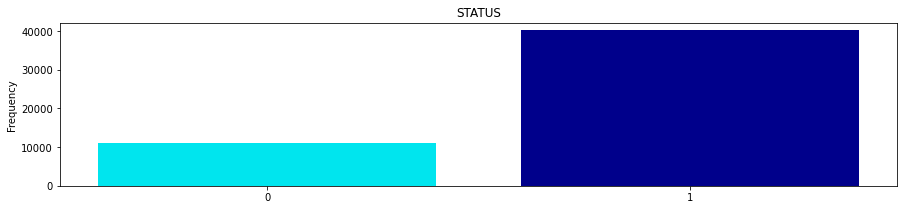

STATUS: 
 1    40151
0    11019
Name: STATUS, dtype: int64


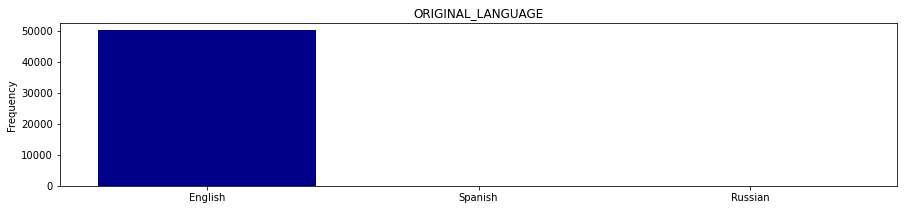

ORIGINAL_LANGUAGE: 
 English    50024
Spanish        1
Russian        1
Name: ORIGINAL_LANGUAGE, dtype: int64


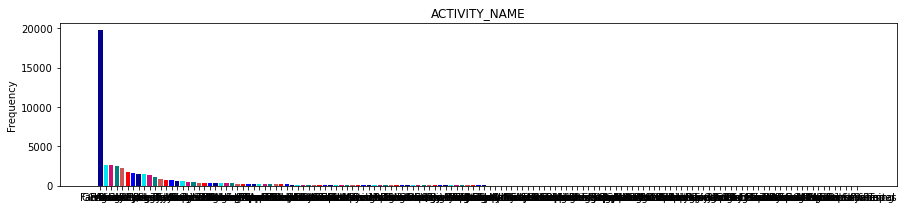

ACTIVITY_NAME: 
 Farming                 19741
Cereals                  2689
Dairy                    2669
General Store            2511
Agriculture              2283
                        ...  
Secretarial Services        1
Computer                    1
Music Discs & Tapes         1
Machinery Rental            1
Event Planning              1
Name: ACTIVITY_NAME, Length: 139, dtype: int64


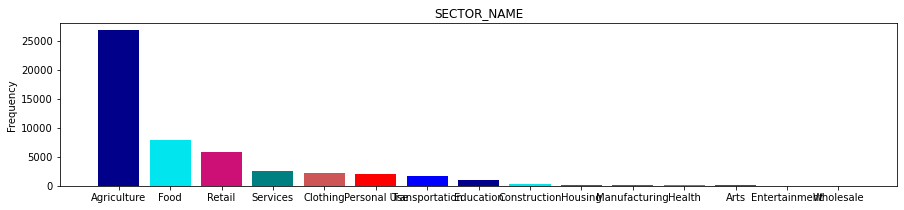

SECTOR_NAME: 
 Agriculture       26810
Food               7956
Retail             5849
Services           2616
Clothing           2232
Personal Use       2033
Transportation     1662
Education           929
Construction        372
Housing             201
Manufacturing       189
Health              167
Arts                121
Entertainment        17
Wholesale            16
Name: SECTOR_NAME, dtype: int64


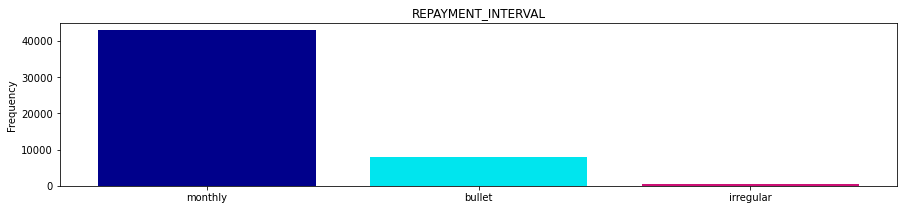

REPAYMENT_INTERVAL: 
 monthly      42867
bullet        7903
irregular      400
Name: REPAYMENT_INTERVAL, dtype: int64


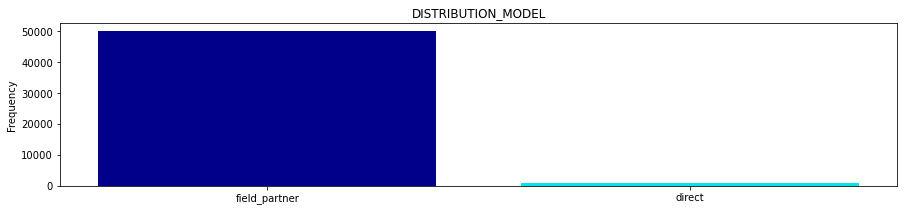

DISTRIBUTION_MODEL: 
 field_partner    50263
direct             907
Name: DISTRIBUTION_MODEL, dtype: int64


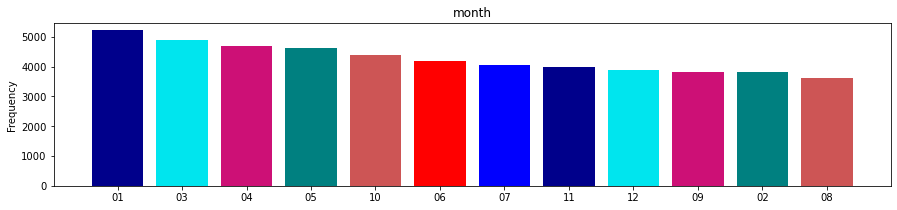

month: 
 01    5214
03    4907
04    4682
05    4623
10    4379
06    4180
07    4062
11    3999
12    3885
09    3821
02    3808
08    3610
Name: month, dtype: int64


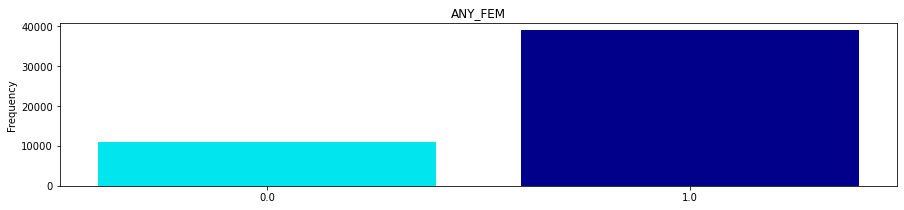

ANY_FEM: 
 1.0    38968
0.0    11058
Name: ANY_FEM, dtype: int64


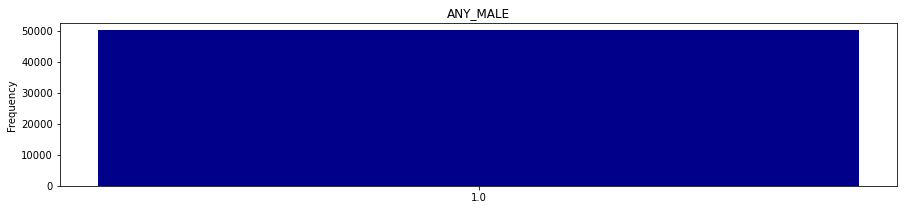

ANY_MALE: 
 1.0    50026
Name: ANY_MALE, dtype: int64


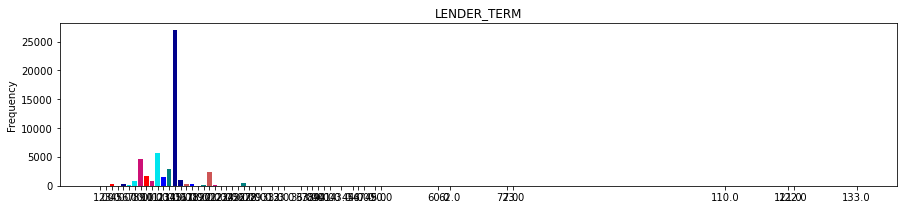

LENDER_TERM: 
 14.0     26932
11.0      5769
8.0       4645
13.0      2986
20.0      2441
9.0       1674
12.0      1510
15.0      1003
7.0        776
10.0       767
26.0       533
16.0       393
3.0        380
17.0       319
5.0        235
6.0        223
21.0        81
19.0        55
40.0        46
24.0        43
2.0         42
39.0        32
28.0        31
4.0         28
27.0        24
18.0        23
72.0        23
33.0        20
25.0        18
31.0        15
49.0        12
22.0        11
73.0        11
29.0        10
32.0        10
41.0         9
23.0         7
45.0         4
121.0        4
110.0        3
38.0         3
133.0        3
1.0          2
62.0         2
122.0        2
43.0         2
50.0         2
37.0         2
36.0         1
46.0         1
60.0         1
47.0         1
Name: LENDER_TERM, dtype: int64


In [15]:
#Plots and correlation
#Plotting the bar plots for all categorical variables
def bar_plot(dataset, variable):
    var =dataset[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    
categoryc = ["STATUS", "ORIGINAL_LANGUAGE", "ACTIVITY_NAME", "SECTOR_NAME", "REPAYMENT_INTERVAL", "DISTRIBUTION_MODEL", "month", "ANY_FEM", "ANY_MALE", "LENDER_TERM"]

for c in categoryc:
    bar_plot(kivake, c)

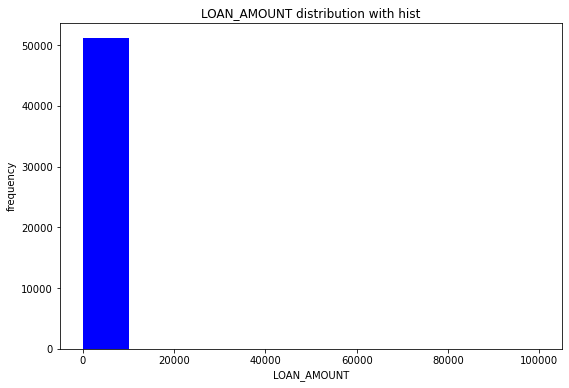

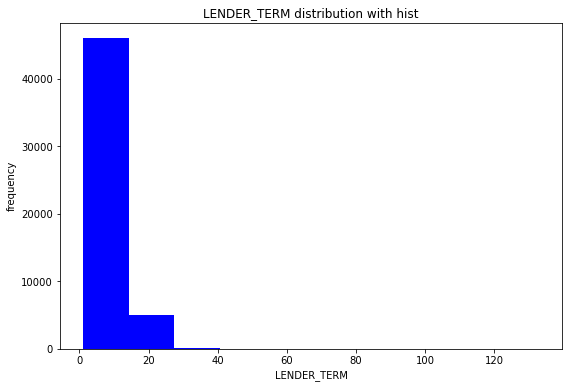

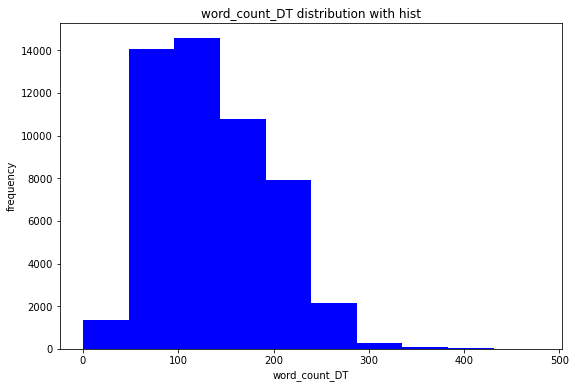

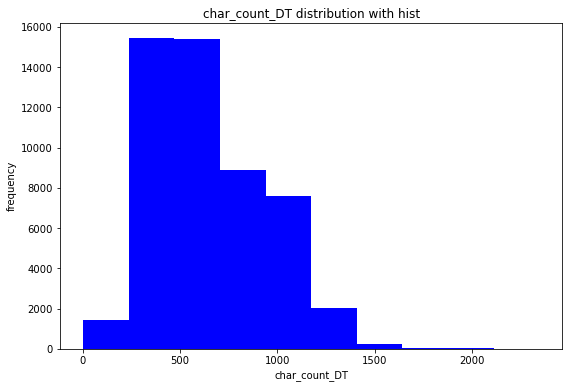

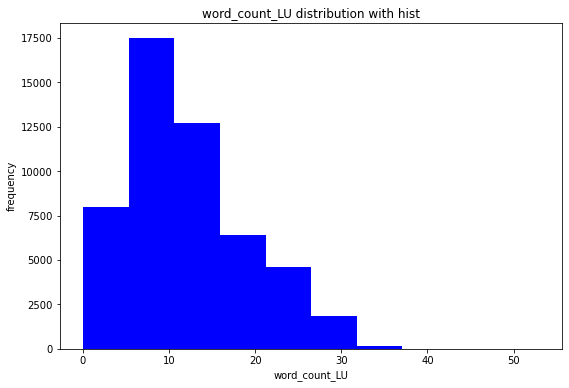

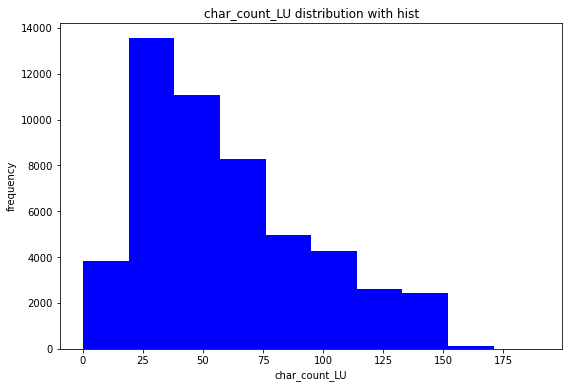

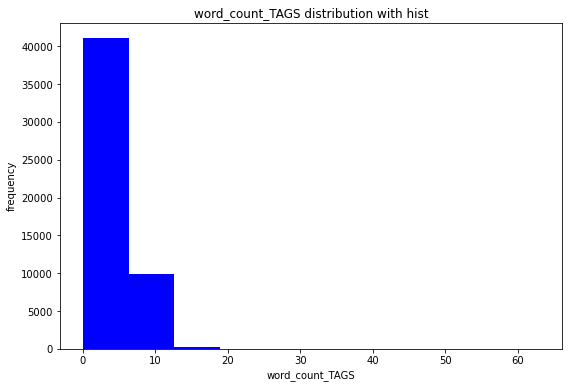

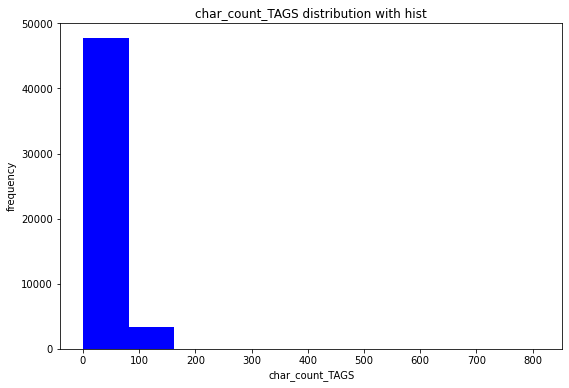

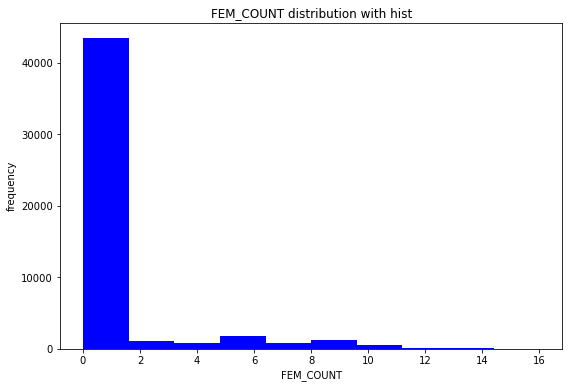

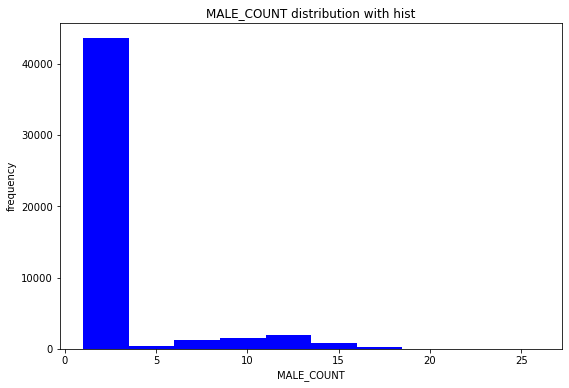

In [16]:
#Plotting histograms for numeric variables

def plot_hist(dataset, variable):
    plt.figure(figsize=(9,6))
    plt.hist(dataset[variable], bins=10,color='blue')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    
numericVar = ["LOAN_AMOUNT","LENDER_TERM","word_count_DT", "char_count_DT", "word_count_LU", "char_count_LU", "word_count_TAGS", "char_count_TAGS", "FEM_COUNT", "MALE_COUNT"]
for n in numericVar:
    plot_hist(kivake, n)

<AxesSubplot:>

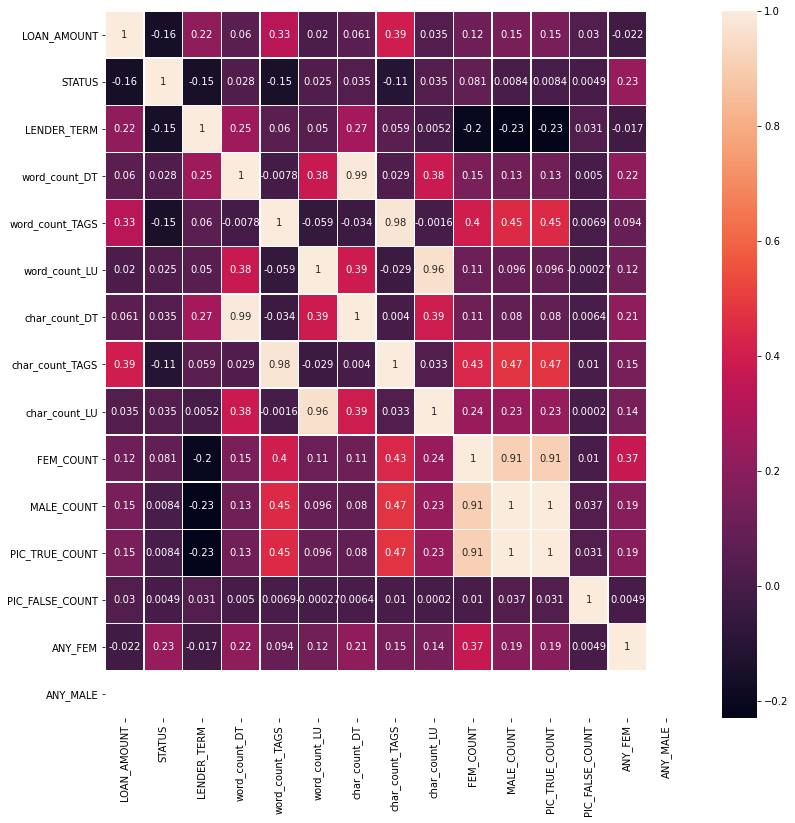

In [17]:
#Plotting correlation
fig, ax = plt.subplots(figsize=(13,13))         

# Sample figsize in inches
sns.heatmap(kivake.corr(), annot=True, linewidths=.5, ax=ax)

In [19]:
#Reducing activity_name to some key attributes
cond = kivake['ACTIVITY_NAME'].value_counts()
threshold = 500
kivake['ACTIVITY_NAME'] = np.where(kivake['ACTIVITY_NAME'].isin(cond.index[cond >= threshold ]), kivake['ACTIVITY_NAME'], 'miscellaneous')

kivake['ACTIVITY_NAME'].value_counts()

<ipython-input-19-164685fdfb2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kivake['ACTIVITY_NAME'] = np.where(kivake['ACTIVITY_NAME'].isin(cond.index[cond >= threshold ]), kivake['ACTIVITY_NAME'], 'miscellaneous')


Farming                           19741
miscellaneous                      8803
Cereals                            2689
Dairy                              2669
General Store                      2511
Agriculture                        2283
Home Energy                        1786
Retail                             1628
Fruits & Vegetables                1532
Clothing Sales                     1457
Motorcycle Transport               1417
Poultry                            1164
Grocery Store                       891
Beauty Salon                        700
Tailoring                           679
Primary/secondary school costs      668
Food                                552
Name: ACTIVITY_NAME, dtype: int64

In [20]:
#Reducing country-code to only above threshold
cond = kivake['COUNTRY_CODE'].value_counts()
threshold = 1000
kivake['COUNTRY_CODE'] = np.where(kivake['COUNTRY_CODE'].isin(cond.index[cond >= threshold ]), kivake['COUNTRY_CODE'], 'miscellaneous')

kivake['COUNTRY_CODE'].value_counts()

<ipython-input-20-e123e68f4375>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kivake['COUNTRY_CODE'] = np.where(kivake['COUNTRY_CODE'].isin(cond.index[cond >= threshold ]), kivake['COUNTRY_CODE'], 'miscellaneous')


KE    51170
Name: COUNTRY_CODE, dtype: int64

In [21]:
#Creating interraction terms
kivake['word_char_DT'] = kivake['word_count_DT'] * kivake['char_count_DT']
kivake['word_char_TAGS'] = kivake['word_count_TAGS'] * kivake['char_count_TAGS']
kivake['word_char_LU'] = kivake['word_count_LU'] * kivake['char_count_LU']

kivake['MALE_FEM'] = kivake['MALE_COUNT']*kivake['FEM_COUNT']
kivake['MALE_PIC'] = kivake['MALE_COUNT']*kivake['PIC_TRUE_COUNT']
kivake['FEM_PIC'] = kivake['FEM_COUNT']*kivake['PIC_TRUE_COUNT']

<ipython-input-21-092c1f8c1177>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kivake['word_char_DT'] = kivake['word_count_DT'] * kivake['char_count_DT']
<ipython-input-21-092c1f8c1177>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kivake['word_char_TAGS'] = kivake['word_count_TAGS'] * kivake['char_count_TAGS']
<ipython-input-21-092c1f8c1177>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [34]:
#Creating file for model to work
kivake.to_csv('kivasmall.csv', index=False)

In [22]:
kivake.dtypes

ORIGINAL_LANGUAGE      object
LOAN_AMOUNT           float64
STATUS                  int64
ACTIVITY_NAME          object
SECTOR_NAME            object
COUNTRY_CODE           object
LENDER_TERM           float64
REPAYMENT_INTERVAL     object
DISTRIBUTION_MODEL     object
word_count_DT           int64
word_count_TAGS         int64
word_count_LU           int64
char_count_DT           int64
char_count_TAGS         int64
char_count_LU           int64
FEM_COUNT             float64
MALE_COUNT            float64
PIC_TRUE_COUNT        float64
PIC_FALSE_COUNT       float64
ANY_FEM               float64
ANY_MALE              float64
month                  object
word_char_DT            int64
word_char_TAGS          int64
word_char_LU            int64
MALE_FEM              float64
MALE_PIC              float64
FEM_PIC               float64
dtype: object